In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
def fecha(data, dia):
    data["Date"] = data["ds"].str[0:8]
    data["Date"] = pd.to_datetime(data["Date"], format="%Y%m%d").dt.date
    data["Time"] = data["ds"].str[9:15]
    data["Time"] = pd.to_datetime(data["Time"], format="%H%M%S").dt.time
    data["ds"] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
    if dia != None:
        data = data[data["ds"].dt.day == dia]
    #data = data[["ds", "Close", "Volume"]]
    return data


In [5]:
## CONJUNTO DE DATOS A

df_A = pd.read_csv("ES 03_25_Last.txt", sep=";", names=["ds", "Open", "High", "Low", "Close", "Volume"])
df_A = fecha(df_A, None)
df_A["idx"] = np.array(list(range(0,len(df_A))))
df_A["idx"] = df_A["idx"].astype(str)

In [18]:
## CONJUNTO DE DATOS B

df_B = pd.read_csv("Data/B_CL MAR23.Last.txt", sep=";", names=["ds", "Open", "High", "Low", "Close", "Volume"])
df_B = fecha(df_B, None)
df_B["idx"] = np.array(list(range(0,len(df_B))))
df_B["idx"] = df_B["idx"].astype(str)

In [19]:
## CONJUNTO DE DATOS C

df_C = pd.read_csv("Data/C_CL APR23.Last.txt", sep=";", names=["ds", "Open", "High", "Low", "Close", "Volume"])
df_C = fecha(df_C, None)
df_C["idx"] = np.array(list(range(0,len(df_C))))
df_C["idx"] = df_B["idx"].astype(str)

In [20]:
## CONJUNTO DE DATOS D

df_D = pd.read_csv("Data/D_CL MAY23.Last.txt", sep=";", names=["ds", "Open", "High", "Low", "Close", "Volume"])
df_D = fecha(df_D, None)
df_D["idx"] = np.array(list(range(0,len(df_D))))
df_D["idx"] = df_D["idx"].astype(str)
print(df.shape)

(360, 8)


In [21]:
## CONJUNTO DE DATOS E

df_E = pd.read_csv("Data/E_CL JUN23.Last.txt", sep=";", names=["ds", "Open", "High", "Low", "Close", "Volume"])
df_E = fecha(df_E, None)
df_E["idx"] = np.array(list(range(0,len(df_E))))
df_E["idx"] = df_E["idx"].astype(str)
print(df.shape)

(360, 8)


In [22]:
df_merged = pd.concat([df_A, df_B, df_C, df_D, df_E])
df_merged.head()

,ds,Open,High,Low,Close,Volume,Date,Time,idx
0,2023-01-02 23:01:00,80.57,80.78,80.36,80.43,246,2023-01-02,23:01:00,0
1,2023-01-02 23:02:00,80.39,80.59,80.35,80.51,124,2023-01-02,23:02:00,1
2,2023-01-02 23:03:00,80.51,80.51,80.39,80.42,50,2023-01-02,23:03:00,2
3,2023-01-02 23:04:00,80.46,80.61,80.45,80.60,75,2023-01-02,23:04:00,3
4,2023-01-02 23:05:00,80.58,80.59,80.40,80.40,43,2023-01-02,23:05:00,4


In [23]:
# Saneamiento Duplicados

df_merged.drop_duplicates(subset=['ds'], keep='first', inplace=True)

duplicated = df_merged['ds'].duplicated()
if duplicated.any():
    print("'True' en campo 'ds'")
else:
    print("'False' en campo 'ds'")

'False' en campo 'ds'


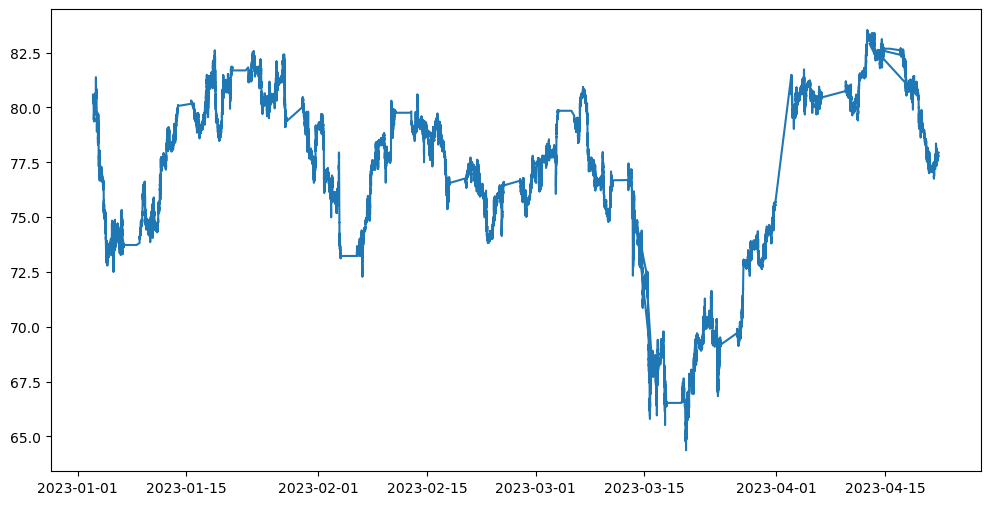

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_merged['ds'], df_merged['Close'])
plt.show()

In [25]:
# Grabación fichero agregado

df_merged.to_csv('Data/Agregado.csv', index=False)